# Исследование для сервиса аренды самокатов GoFast

Я аналитик популярного сервиса аренды самокатов GoFast. Для исследования я использую данные о пользователях сервиса из разных городов, а также об их поездках. Мне предстоит проанализировать данные и проверить некоторые гипотезы, которые помогут бизнесу вырасти

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.
Сервисом можно пользоваться:

**без подписки**

* абонентская плата отсутствует;

* стоимость одной минуты поездки — 
8 рублей;

* стоимость старта (начала поездки) — 
50 рублей;

**с подпиской Ultra**

* абонентская плата — 
199 рублей в месяц;

* стоимость одной минуты поездки — 
6 рублей;

* стоимость старта — бесплатно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

##1 Шаг. Загрузка данных

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

display(users_go.head(5))
display(rides_go.head(5))
display(subscriptions_go.head(5))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [3]:
display(users_go.info())
display(rides_go.info())
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [4]:
display(users_go.describe())
display(rides_go.describe())
subscriptions_go.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


С первого взгляда с данными все в порядке

Перехожу к этапу предобработки для более подробного изучения недочетов

## 2 Шаг. Предобработка данных

### Первым делом поменяю тип столбца date на datetime

In [5]:
rides_go['date'] = pd.to_datetime(
    rides_go['date'], format='%Y-%m-%d'
)

### Cформирую новый столбец с номерами месяца

Данные исследуем за один год - 2021

In [6]:
rides_go['month'] = rides_go['date'].dt.month
display(rides_go['date'].min())
rides_go['date'].max()

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

### Поскольку пропусков не обнаружила, проверю, как обстоят дела с дубликатами и исправлю ситуацию

In [7]:
display(users_go.duplicated().sum())
display(rides_go.duplicated().sum())
display(subscriptions_go.duplicated().sum())

users_go.drop_duplicates(inplace=True)
users_go.duplicated().sum()

31

0

0

0

### Итоги предобработки данных:

1. Пропущенных значений не оказалось
2. Изменила тип данных на правильный
3. Провела работу с дубликатами и удалила повторяющиеся значения


## 3 Шаг. Исследовательский анализ данных

### Посмотрю на самые популярные города по убыванию количества пользователей

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

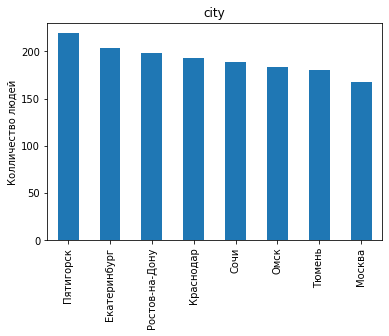

In [8]:
users_go['city'].value_counts().plot(kind = 'bar',title ='city', ylabel = 'Колличество людей')
users_go['city'].value_counts()

0.4556714471968709

0.5443285528031291

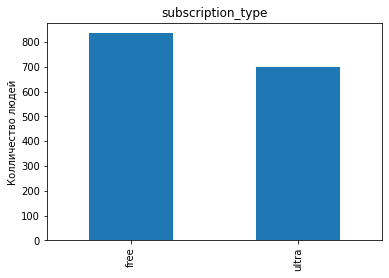

In [9]:
users_go['subscription_type'].value_counts().plot(kind ='bar', title ='subscription_type', ylabel = 'Колличество людей')
users_go['subscription_type'].value_counts()

display(len(users_go.query('subscription_type == "ultra"')) / len(users_go))
len(users_go.query('subscription_type == "free"')) / len(users_go)

Людей без подписки не на много, но больше

### Пользователи каких возростов встречаются чаще

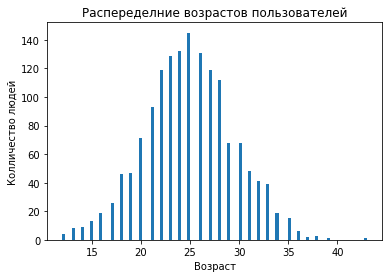

In [10]:
users_go['age'].plot(kind = 'hist', bins = 100 ,title = 'age_users')
plt.title('Распеределние возрастов пользователей')
plt.ylabel('Колличество людей')
plt.xlabel('Возраст')
plt.show;

В выборке присутствуют люди от 12 до 43, ранее я проверила это с помощью describe

БОльшая часть людей - от 20 до 30 лет

###  Расстояние, которое пользователь преодолел за одну поездку

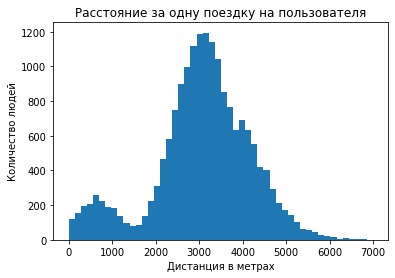

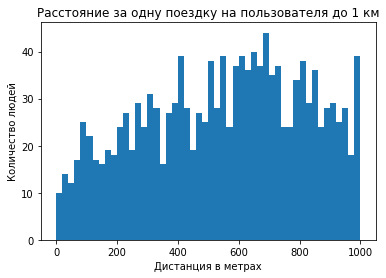

In [11]:
rides_go['distance'].plot.hist(bins = 50, range =(0,7000), title ='Расстояние за одну поездку на пользователя')
plt.xlabel("Дистанция в метрах")
plt.ylabel("Количество людей")
plt.show()
rides_go['distance'].plot(kind ='hist', bins = 50, range =(0,1000), title ='Расстояние за одну поездку на пользователя до 1 км')
plt.xlabel("Дистанция в метрах")
plt.ylabel("Количество людей");

В основном, на самокатах люди проезжают от 2 км до 5 км, чаще всего 3 км

Распределение нормальное, но есть небольшой выброс до 1 км. Люди действительно могут брать самокаты на совсем маленькие расстояния или же просто по своим причинам бронировать и сразу заканчивать поездку на самокатах

Такиех случаев немного, поэтому оставляю все как есть

### Продолжительность поездок

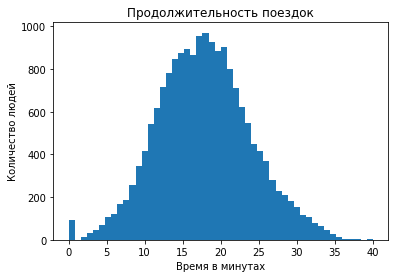

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [12]:
rides_go['duration'].plot(kind = 'hist',bins = 50, range =(0,40))
plt.xlabel("Время в минутах")
plt.ylabel("Количество людей")
plt.title('Продолжительность поездок')
plt.show();

rides_go['duration'].describe()

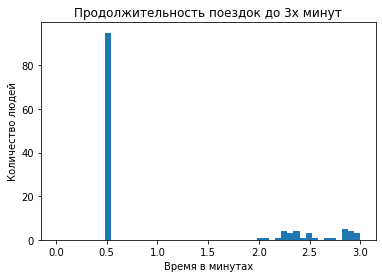

In [13]:
rides_go['duration'].plot(kind = 'hist',bins = 50, range =(0,3))
plt.xlabel("Время в минутах")
plt.ylabel("Количество людей")
plt.title('Продолжительность поездок до 3х минут');

In [14]:
rides_go[rides_go['duration'] == 0.5]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Чаще всего время поездки на самокате занимает от 10 до 25 минут

Но около полуминуты есть выброс, более 80ти поездок с такой скоростью. Также, это минимальное время для поездок. Скорее всего, это поездки, которые отменяли сразу же

При том, дистанция у подобных поездок достигает 6 км. Могу сделать вывод, что в момент подсчета времени таких поездок, происходили технические сбои, которые не записывали время. То есть данные выгрузились с ошибкой. Стоит избавиться от подобных аномалий, чтобы анализ был максимально приближен к истине

In [15]:
rides_go = rides_go.query('duration > 0.5')

## 4 Шаг. Объединение данных

### Сформирую одну таблицу из трех, о пользователях, поездках и подписках вместе

In [16]:
data = users_go.merge(rides_go,on = 'user_id')
data = data.merge(subscriptions_go, on ='subscription_type')
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


### Разделяю на 2 таблицы, пользователей с подпиской и без


In [17]:
with_subscription = data.query('subscription_type == "ultra"')
without_subscription = data.query('subscription_type == "free"')
display(with_subscription.shape)
without_subscription.shape

(6500, 12)

(11473, 12)

Поездок пользователей с подпиской  6500, а без 11473, почти в два раза больше

### Визуализирую информацию о расстоянии и времени поездок для пользователей обеих категорий

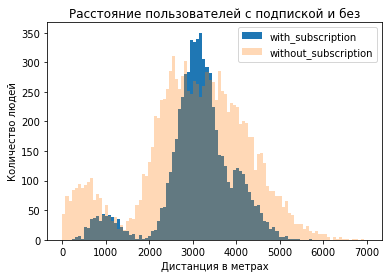

In [18]:
ax = with_subscription['distance']. plot(kind = 'hist', bins = 100, range =(0,7000), label = 'with_subscription',legend=True)
plt.xlabel("Дистанция в метрах")
plt.ylabel("Количество людей")

without_subscription['distance'].plot(kind = 'hist', bins = 100, range =(0,7000), label = 'without_subscription',alpha = 0.3, ax=ax, legend=True)
plt.xlabel("Дистанция в метрах")
plt.ylabel("Количество людей")
plt.title('Расстояние пользователей с подпиской и без');

Построила гистограмму для дистанции поездок клиентов с подписками и без, могу подметить следующее:
    
* В основном дистанция поездок для людей с подпиской составляет от 2,5 до 4,5 км, самый пик у 3 км. Около 1 км есть выброс
* Дистанция поездок без подписки варьируется также от 2 до 5 км, при этом немалый выброс есть в промежутке до 1 км

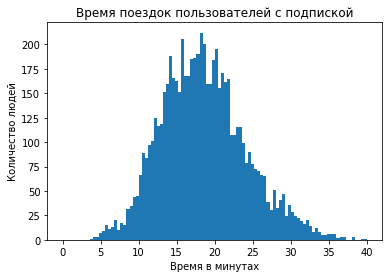

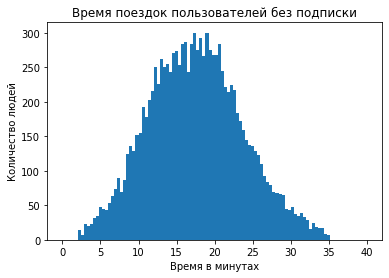

In [19]:
with_subscription['duration']. plot(kind = 'hist', bins = 100, range =(0,40), title = 'Время поездок пользователей с подпиской')
plt.xlabel("Время в минутах")
plt.ylabel("Количество людей")
plt.show()
without_subscription['duration'].plot(kind = 'hist', bins = 100, range =(0,40), title = 'Время поездок пользователей без подписки')
plt.xlabel("Время в минутах")
plt.ylabel("Количество людей");

Что касается среднего времени поездки, оно тоже особо не отличается у людей с подпиской и без

* С подпиской время поездки от 10 до 30 минут
* Без подписки от 7 до 30 минут

## 5 Шаг. Подсчёт выручки

### Найду суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [20]:
data['duration'] = np.ceil(data['duration']) 

data_group = data.groupby(['user_id','month']).agg({'distance':['sum'],'duration':['sum','count']}).reset_index()
data_group.columns =['user_id','month','distance_sum','duration_sum','count']

data_group

,user_id,month,distance_sum,duration_sum,count
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3
...,...,...,...,...,...
11295,1534,6,3409.468534,26.0,2
11296,1534,8,7622.453034,48.0,2
11297,1534,9,4928.173852,23.0,1
11298,1534,11,13350.015305,78.0,4


In [21]:
for_func = data[['subscription_fee','start_ride_price','minute_price','subscription_type']]
data_group = data_group.join(for_func)

data_group

,user_id,month,distance_sum,duration_sum,count,subscription_fee,start_ride_price,minute_price,subscription_type
0,1,1,7027.511294,42.0,2,199,0,6,ultra
1,1,4,754.159807,7.0,1,199,0,6,ultra
2,1,8,6723.470560,46.0,2,199,0,6,ultra
3,1,10,5809.911100,32.0,2,199,0,6,ultra
4,1,11,7003.499363,56.0,3,199,0,6,ultra
...,...,...,...,...,...,...,...,...,...
11295,1534,6,3409.468534,26.0,2,0,50,8,free
11296,1534,8,7622.453034,48.0,2,0,50,8,free
11297,1534,9,4928.173852,23.0,1,0,50,8,free
11298,1534,11,13350.015305,78.0,4,0,50,8,free


### Добавлю столбец с помесячной выручкой, которую принёс каждый пользователь

In [22]:
data_group['month_revenue'] = data_group['start_ride_price']*data_group['count']+data_group['minute_price']*data_group['duration_sum']+data_group['subscription_fee']
data_group

,user_id,month,distance_sum,duration_sum,count,subscription_fee,start_ride_price,minute_price,subscription_type,month_revenue
0,1,1,7027.511294,42.0,2,199,0,6,ultra,451.0
1,1,4,754.159807,7.0,1,199,0,6,ultra,241.0
2,1,8,6723.470560,46.0,2,199,0,6,ultra,475.0
3,1,10,5809.911100,32.0,2,199,0,6,ultra,391.0
4,1,11,7003.499363,56.0,3,199,0,6,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
11295,1534,6,3409.468534,26.0,2,0,50,8,free,308.0
11296,1534,8,7622.453034,48.0,2,0,50,8,free,484.0
11297,1534,9,4928.173852,23.0,1,0,50,8,free,234.0
11298,1534,11,13350.015305,78.0,4,0,50,8,free,824.0


Составила новый датафрейм с агрегированными данными и добавила столбец с подсчетом месячной выручки от клиентов

## 6 Шаг. Проверка гипотез

### Первая гипотеза. Различие времени поездки для людей с подпиской и без

* Нулевая гиипотеза: Среднее время для людей с подпиской и без не различается

* Альтернативная гипотеза: Среднее время людей с подпиской больше, чем у людей без подписки

In [23]:
wsd= with_subscription['duration'].mean()
display(F'Среднее время поездок людей с подпиской: {wsd}')
wosd = without_subscription['duration'].mean()
display(F'Среднее время поездок людей без подписки: {wosd}')

alpha = 0.05

results = st.ttest_ind(with_subscription['duration'],without_subscription['duration'], alternative ='greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Среднее время людей с подпиской больше, чем у людей без подписки')
else:
    print('Среднее время для людей с подпиской и без не различается') 

'Среднее время поездок людей с подпиской: 18.54198516280583'

'Среднее время поездок людей без подписки: 17.530771268800226'

p-значение: 1.6162210195311063e-29
Среднее время людей с подпиской больше, чем у людей без подписки




Проверила первую гипотезу. Время, которое люди с подпиский тратят на проезд имеет различие, оно больше, чем у людей без подписки.
Поэтому пользователи с подпиской и правда выгоднее для компании

**Нулевую гипотезу отвергаю**

### Вторая гипотеза. Влияют ли пользователи с подпиской на износ самоката

* Нулевая гипотеза: Люди с подпиской не превышают максимальную дистанцию для износа самоката


* Альтернативная гипотеза: Максимальная дистанция для износа самоката больше нормы


In [24]:
optimal_time = 3130
alpha = 0.05

results = st.ttest_1samp(with_subscription['distance'], optimal_time, alternative ='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Максимальная дистанция для износа самоката больше нормы')
else:
    print('Люди с подпиской не превышают максимальную дистанцию для износа самоката') 

p-значение: 0.9195368847849785
Люди с подпиской не превышают максимальную дистанцию для износа самоката


Проверила вторую гипотезу

Могу смело сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров и поэтому такие пользователи не влияют на износ самокатов

**Нулевую гипотезу подтверждаю**

### Третья гипотеза. Проверю различие в выручке отпользователей с подпиской и без

* Нулевая гипотеза: Выручка от людей с подпиской и без не отличается


* Альтернативная гипотеза: Выручка от клиентов с подпиской больше, чем у клиентов без подписки

In [25]:
with_subscription_group = data_group.query('subscription_type == "ultra"')
without_subscription_group = data_group.query('subscription_type == "free"')

wsr = with_subscription_group['month_revenue'].mean()
display(F'Средняя выручка от клиентов  с подпиской: {wsr}')
wosr = without_subscription_group['month_revenue'].mean()
display(F'Средняя выручка от клиентов  без подписки: {wosr}')

alpha = 0.05
results = st.ttest_ind(with_subscription_group['month_revenue'],without_subscription_group['month_revenue'], alternative ='greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Выручка от клиентов с подпиской больше')
else:
    print('Выручка от людей с подпиской и без не отличается') 

'Средняя выручка от клиентов  с подпиской: 369.00123076923074'

'Средняя выручка от клиентов  без подписки: 328.84583333333336'

p-значение: 2.881356457558677e-43
Выручка от клиентов с подпиской больше


Проверила третью гипотезу 

**Нулевую гипотезу отвергаем в пользу альтернативной, выручки больше приносят люди с подпиской**

### Вопрос:
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?


- Для проверки гипотезы о снижении обращений пользователей в тех поддержку до обновлнения и после понадобится тест для зависимых выборок. Така как выборки остаются одинаковыми за исключением обращений после изменений

  В питоне метод для проверки подобных гипотез выглядит так: scipy.stats.ttest_rel()



# Итоги исследования:


1. Изначально я загрузила 3 файла с данными о пользователях, поездках и наличии подписки

2. Провела предобработку данных, изменила тип и отчистила от повторных значений

3. Провела исследовательский анализ:

* Частоту встречаемости городов:

   - Пятигорск        
   - Екатеринбург    
   - Ростов-на-Дону   
   - Краснодар        
   - Сочи
   - Омск
   - Тюмень   
   - Москва    

* Выяснила, что людей без подписки 835, а с подпиской 699
* Возраст пользователей в среднем варьируется от 20 до 30 лет
* Средняя продолжительность поездок от 10 до 30 минут, был небольшой выброс около 0,5 минуты, который я посчитала нужным отбросить. С такими поездками все в порядке, кроме времени. Скорее всего при выгрузке данных произошел сбойБ или же время на самих самокатах по техническим причинам не записывалось
* В основном дистанция поездок для людей с подпиской составляет от 2,5 до 4,5 км, самый большой пик у 3 км, на 1 км есть выброс
* Дистанция поездок без подписки варьируется также от 2 до 5 км, при этом немалый выброс есть в промежутке до 1 км
4. Проверила три гипотезы: 

* **Первая гипотеза оказалась значимой**. Время, которое люди с подпиский тратят на проезд имеет различие, оно больше, чем у людей без подписки. Поэтому пользователи с подпиской и правда выгоднее для компании. Подписка моиивирует пользователей совершать более длительные поездки
* **Вторая гипотеза отвергнута**. Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров и поэтому такие пользователи не влияют на износ самокатов. Этот момент также доказывает большую выгоду от пользователей с подпиской
* **Третья гипотеза значимая**. Пользователи с подпиской приносят больше выручки

# Рекомендации:

В ходе исследования удалось выяснить, что пользователи с подпиской выгоднее для компании, чем без подписки. Стоит уделять больше внимания таким пользователям, чтобы они и дальше продолжали пользоваться подпиской у нас. А также привлекать больше пользователей для подключения подписки

В этом помогут программы лояльности. Например: первый месяц подписки бесплатный; реферальная программа для приглашения друзей и получения за это различных бонусов и так далее